# SM_London - Exploratory Data Analysis

In [66]:
#Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import math
import missingno as msno
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

### Importing Data

In [51]:
energy_df = pd.read_csv('/Users/nicolasrosal/Desktop/Machine Learning Projects/SM_London/Datasets after Cleaning/energy_df.csv')

In [52]:
energy_df['uvIndex'] = energy_df['uvIndex'].replace([0,1,2], 'Low').replace([3,4,5], 'Medium').replace([6,7], 'High')

### EDA

- Weather Data:

In [ ]:
#Visualise data
energy_df.head()

     Univariate Analysis

In [ ]:
#Describe Numerical Features
energy_df.describe()

In [30]:
# Describe Categorical Features
energy_df.describe(include=['O'])

LCLid stdorToU    Acorn Acorn_grouped               icon  \
count     3458674  3458674  3458674       3458674            3458674   
unique       5560        2       18             5                  6   
top     MAC000147      Std  ACORN-E      Affluent  partly-cloudy-day   
freq          824  2762740  1009189       1388081            2520680   

       precipType  uvIndex    sunset   sunrise   Season  
count     3458674  3458674   3458674   3458674  3458674  
unique          2        3         5         5        4  
top          rain      Low  20:00:00  08:00:00   Winter  
freq      3388959  1951613    919000    856999  1038094

In [5]:
# Check the starting and finishing date of dataset
print("Start date is", min(energy_df['day']))
print("End date is", max(energy_df['day']))

Start date is 2011-11-24
End date is 2014-02-27


In [6]:
# Check population of Acorns in London
energy_df['Acorn'].value_counts()

ACORN-E    1009189
ACORN-Q     524688
ACORN-F     440475
ACORN-H     268104
ACORN-L     201059
ACORN-D     186325
ACORN-G     121981
ACORN-K     104813
ACORN-A      91571
ACORN-N      90508
ACORN-C      87492
ACORN-P      71084
ACORN-M      65243
ACORN-J      63834
ACORN-O      59937
ACORN-U      29076
ACORN-I      29023
ACORN-B      14272
Name: Acorn, dtype: int64

In [53]:
#Checking acorn agglomerations
energy_df['Acorn_grouped'].unique()

array(['Affluent', 'ACORN-', 'Comfortable', 'Adversity', 'ACORN-U'],
      dtype=object)

In [54]:
#Checking elements under 'ACORN-' and 'ACORN-U'
print(energy_df[energy_df['Acorn_grouped'] == 'ACORN-U']['Acorn'].unique())
print(energy_df[energy_df['Acorn_grouped'] == 'ACORN-']['Acorn'].unique())

['ACORN-U']
['ACORN-E']


In [55]:
#Fixing the 'Acorn_grouped' column following the Acorn User Guide

affluent = ['ACORN-A', 'ACORN-B', 'ACORN-C']
rising = ['ACORN-D', 'ACORN-E']
comfortable = ['ACORN-F', 'ACORN-G', 'ACORN-H', 'ACORN-I', 'ACORN-J']
stretched = ['ACORN-K', 'ACORN-L', 'ACORN-M', 'ACORN-N']
adversity = ['ACORN-O', 'ACORN-P', 'ACORN-Q']
other = ['ACORN-U']

groups = []

for acorn in energy_df['Acorn']:
    if acorn in affluent:
        groups.append('Affluent')
    elif acorn in comfortable:
        groups.append('Comfortable')
    elif acorn in rising:
        groups.append('Rising')
    elif acorn in stretched:
        groups.append('Stretched')
    elif acorn in adversity:
        groups.append('Adversity')
    elif acorn in other:
        groups.append('Other')
        
energy_df['Acorn_grouped'] = groups

In [56]:
#Re-Checking acorn agglomerations
energy_df['Acorn_grouped'].unique()

array(['Affluent', 'Rising', 'Comfortable', 'Stretched', 'Adversity',
       'Other'], dtype=object)

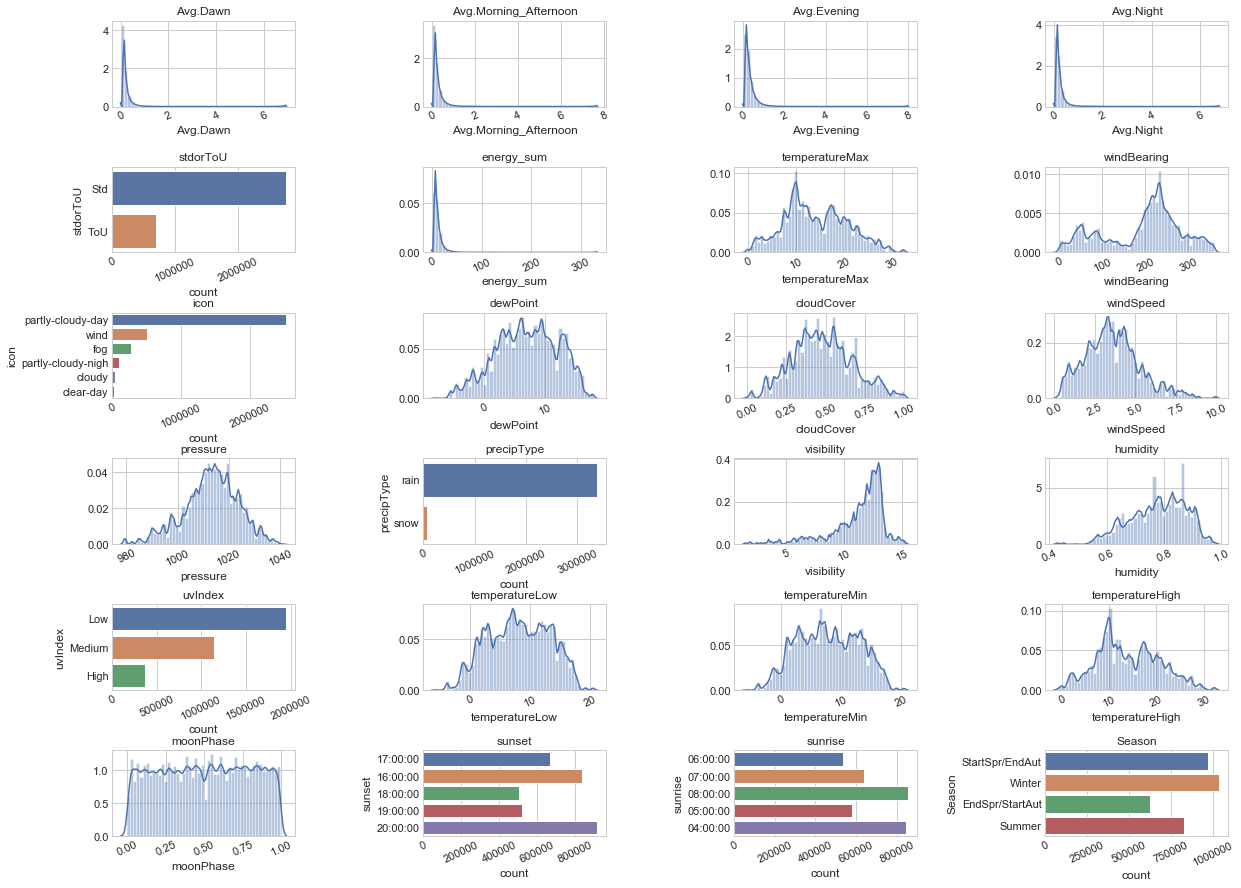

In [7]:
#Plot distributions of each feature (from: Daniel Martinez)
def plot_distribution(dataset, cols=4, width=20, height=15, hspace=0.7, wspace=0.7):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(energy_df.drop(['LCLid','day','Acorn', 'Acorn_grouped', 'holiday'], axis = 1))

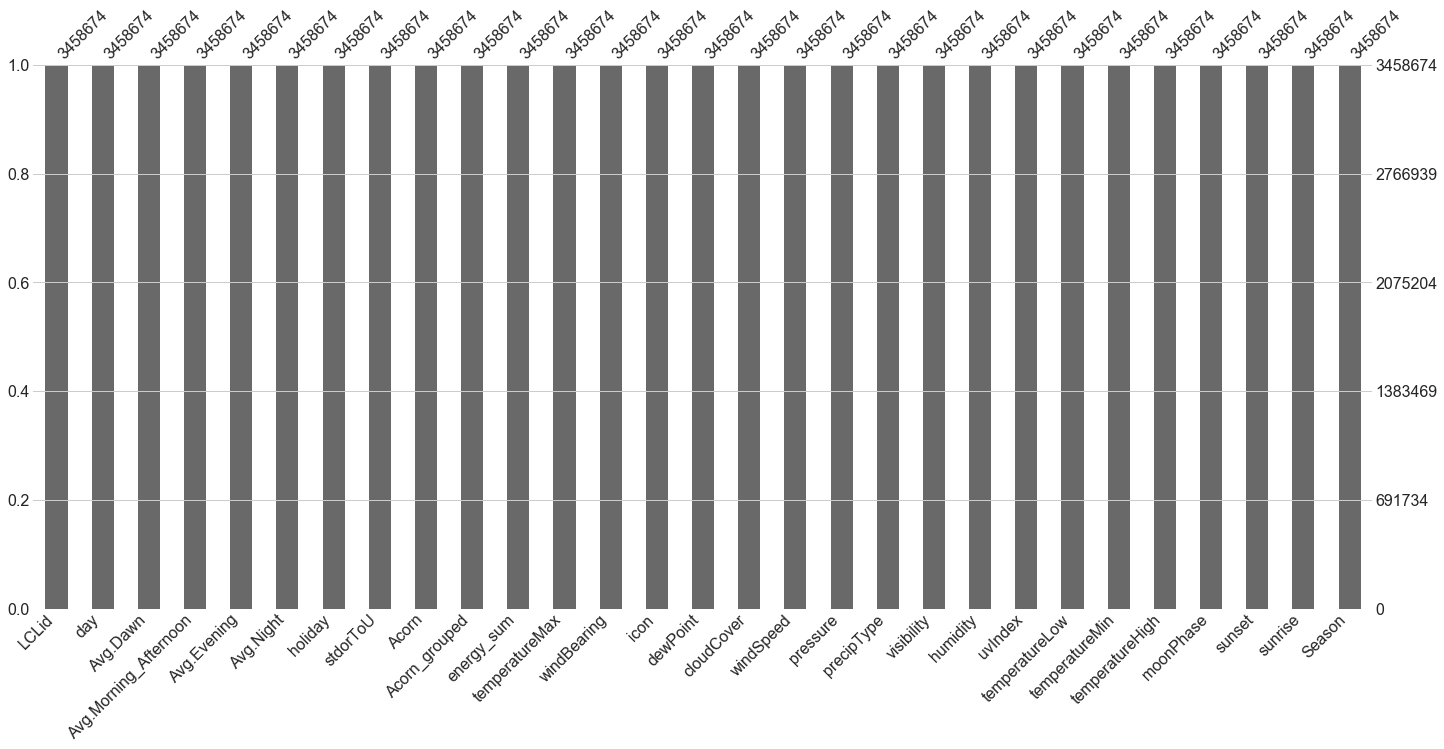

In [8]:
#Visualising Missing Values
msno.bar(energy_df)
plt.show()

In [9]:
#Function to retrieve outliers
def find_outliers(dataset):
    
    outliers = {}
    
    for i in list(dataset.loc[:, dataset.dtypes != np.object]):
        Q1 = dataset[i].quantile(0.25)
        Q3 = dataset[i].quantile(0.75)
        IQR = Q3 - Q1
        num_outliers = ((dataset[i] < (Q1 - 1.5 * IQR)) | (dataset[i] > (Q3 + 1.5 * IQR)))
        outliers[i] = num_outliers
        
    return outliers

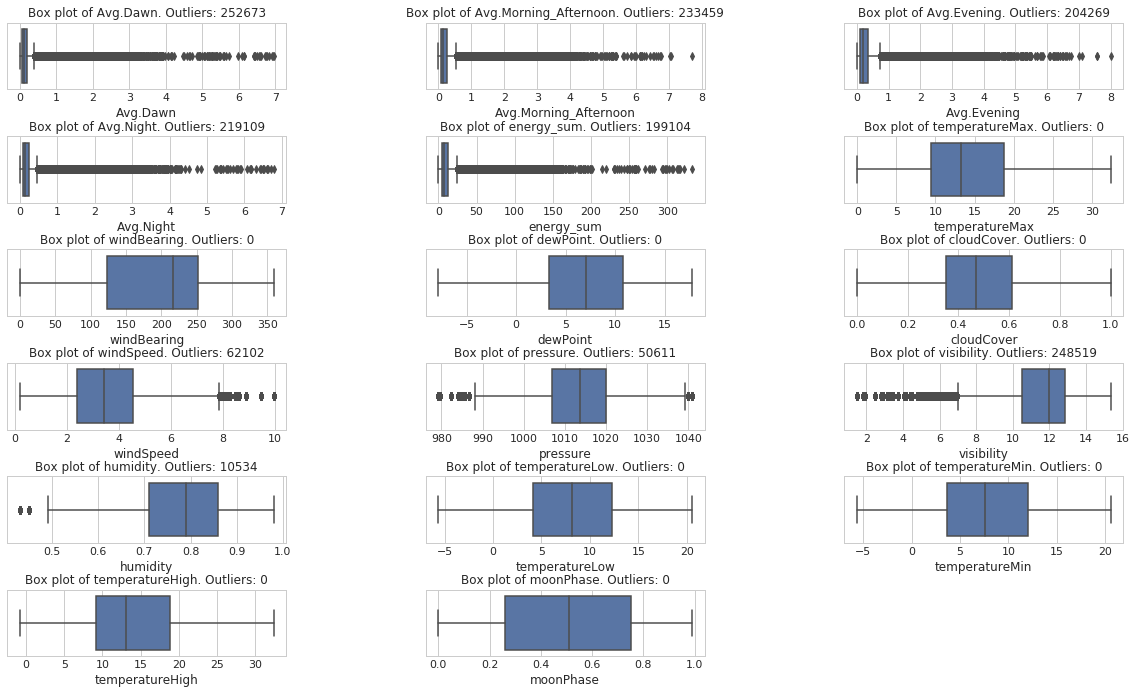

In [10]:
#Testing for outliers
def plot_box(dataset, cols=3, width=20, height=20, hspace=0.7, wspace=0.5):
    
    outliers = find_outliers(dataset)
    
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(outliers.keys()):
        ax = fig.add_subplot(rows, cols, i + 1)
        g = sns.boxplot(dataset[column])
        ax.set_title('Box plot of {}. Outliers: {}'.format(column, outliers[column].sum()))
    
plot_box(energy_df.drop('holiday', axis = 1))
plt.style.use('default')

<div class="alert alert-block alert-info">
    We have identified that <b>'visibility'</b> presents a high number of outliers (given that its skewed to the left). We will further explore these outliers to verify if their values make sense. Given that visibility can change significantly during certain days of the year, removing these would not be pertinent (unless they are unreasonable values). Moreover, we have identified outliers in <b>'energy_sum', 'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening'</b>, and <b>'Avg.Night'</b>. We will also explore these values to verify if they are reasonable given the scale and nature of the data.
</div>

In [11]:
# Dictionary of Boolean masks of outliers per column
outliers_dict = find_outliers(energy_df)

In [ ]:
#Replacing 'energy_sum' outlier with median of data
#weather_df.loc[outliers_dict['energy_sum'] == True, 'energy_sum'] =  np.median(energy_df['energy_sum'])

     Multivariate Analysis

In [12]:
def outliers_vs_season(column):
    outliers = energy_df[outliers_dict[column] == True]
    outlier_season = outliers.groupby('Season')[column].size()
    
    num_outliers = []
    seasons = ['Winter', 'Summer', 'StartSpr/EndAut', 'EndSpr/StartAut']

    for season in seasons:
        num_outliers.append(outlier_season[season])
    
    sns.barplot(seasons, num_outliers)
    plt.title('Number of outliers per Season')
    plt.xlabel('Season')
    plt.ylabel('Number of Outliers:' + str(column))
    plt.show()

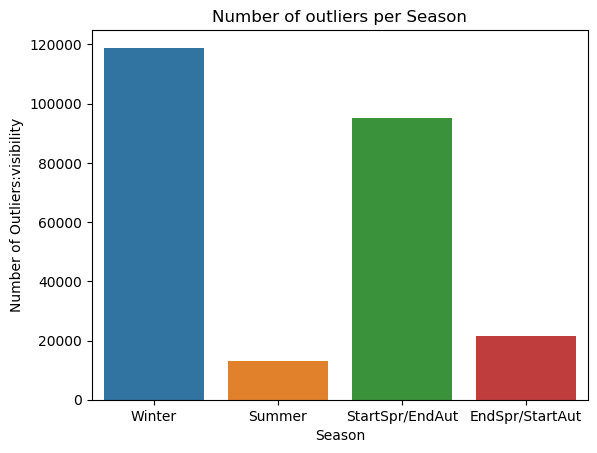

In [13]:
## Exploring 'visibility' outliers
outliers_vs_season('visibility')

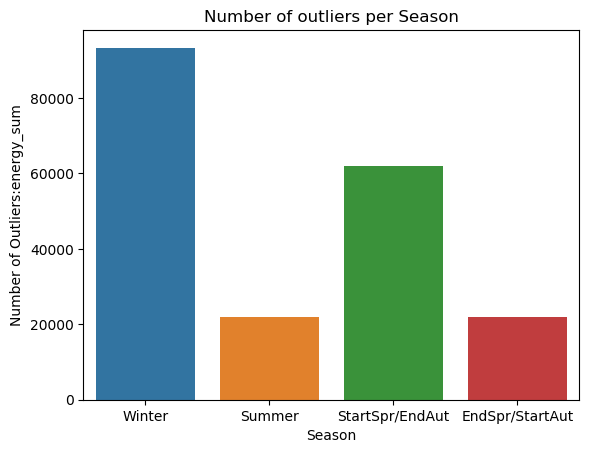

In [14]:
outliers_vs_season('energy_sum')

In [ ]:
#getting outliers
energy_outliers = energy_df[outliers_dict['energy_sum'] == True]
energy_outliers_df = pd.DataFrame(energy_outliers[['LCLid', 'Season', 'energy_sum', 'Acorn']])

#Pivot Table
pivot = pd.pivot_table(energy_outliers_df, index=['Acorn', 'Season'], values=['energy_sum', 'LCLid'], aggfunc=lambda x: len(x.unique()))
pivot['Energy per Household'] = pivot['energy_sum'] / pivot['LCLid']
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pivot)
    
#Normalizing
(max(energy_df['energy_sum']) - np.mean(energy_df['energy_sum'])) / np.std(energy_df['energy_sum'])

#Boundary
boundary = np.mean(energy_df['energy_sum']) + 5 * np.std(energy_df['energy_sum'])
ala = energy_outliers_df[energy_outliers_df['energy_sum'] > boundary]['LCLid'].value_counts() 

#Extra
ala[ala < 30]
energy_outliers_df.shape[0]/energy_df.shape[0]

<div class="alert alert-block alert-info">
Given that visibility can change significantly during certain days of the year, removing these would not be pertinent (unless they are unreasonable values). In this case, it is evidenced that most of the outliers occur in <b> Winter </b>  and <b>StartSpr/EndAut</b> which makes makes sense as visibility decreases during colder periods.
    <div>

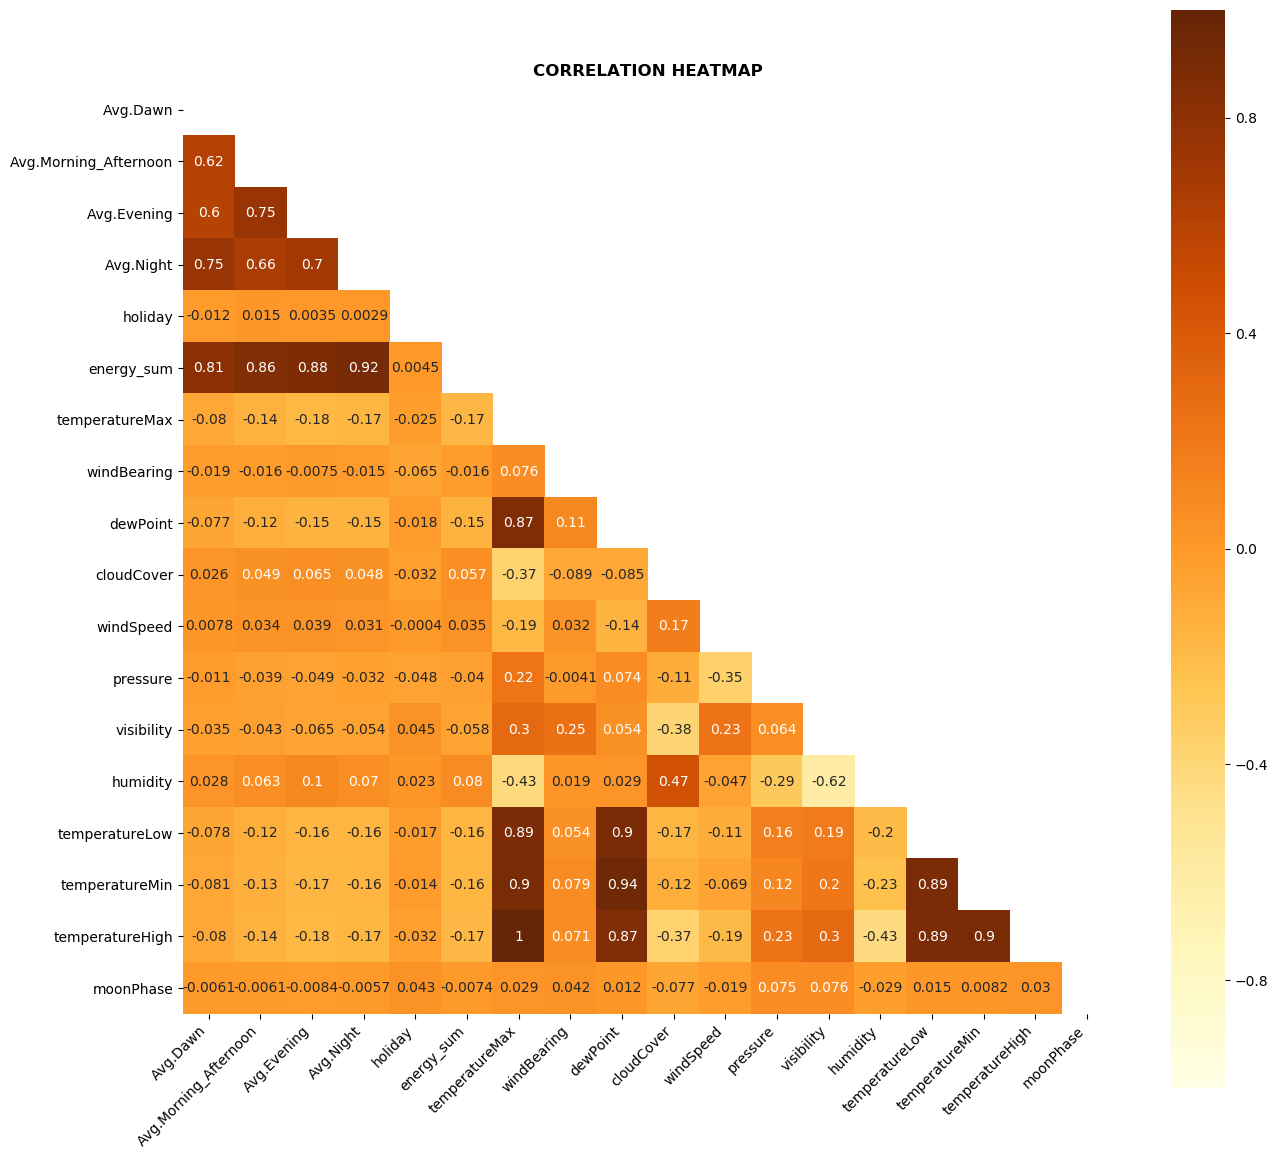

In [15]:
#Correlation Heatmap
corr = energy_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(15, 14))

ax = sns.heatmap(
    corr, mask = mask, 
    vmin = -1, vmax = 1, center = 0,
    cmap = 'YlOrBr',
    square = True, 
    annot = True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

plt.title('CORRELATION HEATMAP', fontweight="bold")
plt.show()

<div class="alert alert-block alert-info">
    <p>With the correlation heatmap, we identified the following:</p>
        <p>- 'temperatureMax' appears to have a  <b>strong positive correlation</b> (0.85 +) with 'temperatureLow', 'temperatureMin','temperatureHigh', and 'dewPoint'</p>
        <p>- 'dewPoint' appears to have a  <b>strong positive correlation</b> (0.85 +) with 'temperatureLow', 'temperatureMin','temperatureHigh', and 'temperatureMax'</p>
        <p>- 'temperatureLow' appears to have a <b>strong positive correlation</b> (0.85 +) with 'temperatureHigh' and 'temperatureMin'</p>
        <p>- 'temperatureMax' appears to have a <b>strong negative correlation</b> (-0.85 -) with 'energy_sum'</p>
        <p>- 'temperatureMin' appears to have a <b>strong negative correlation</b> (0.80+) with 'energy_sum'</p>
        <p>- 'temperatureHigh' appears to have a <b>strong negative correlation</b> (0.80+) with 'energy_sum'</p>
        <p>- 'energy_sum' appears to have a <b>strong positive correlation</b> (0.80+) with 'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening', and 'Avg.Night'</p>
</div>

In [16]:
#Pairplot of features with strong negative/positive correlation
corr_features1 = ['temperatureMax', 'temperatureLow', 'temperatureMin', 'temperatureHigh', 'dewPoint']
corr_features2 = ['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night', 'energy_sum']

In [ ]:
#Pairwise plot 1
sns.set(style="ticks", color_codes=True)
sns.pairplot(energy_df[corr_features1], diag_kind="kde")
plt.show()

In [ ]:
#Pairwise plot 2
sns.set(style="ticks", color_codes=True)
sns.pairplot(energy_df[corr_features2], diag_kind="kde")
plt.show()

In [57]:
#Dropping correlated variables
energy_df.drop(['temperatureLow', 'temperatureMin', 'temperatureHigh', 'dewPoint'], axis = 1, inplace = True)

<div class="alert alert-block alert-info">
    <p>- 'temperatureMax' was selected out of the other variables for the following reasons: 1) reduce high dimensionality, 2) hotter days have higher minimum temperatures, and  3) 'temperatureLow' and 'temperatureHigh' showed a similar behaviour to 'temperatureMin' and 'temperatureMax' (these information is contained within 'temperatureMax') </p>
    <p>- We have identified a very strong correlation between 'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night', and 'energy_sum'. Nevertheless, we decided to keep all these features for modelling but we will keep in mind this findings in order to avoid undesired outcomes due to the correlation. </p>
</div>

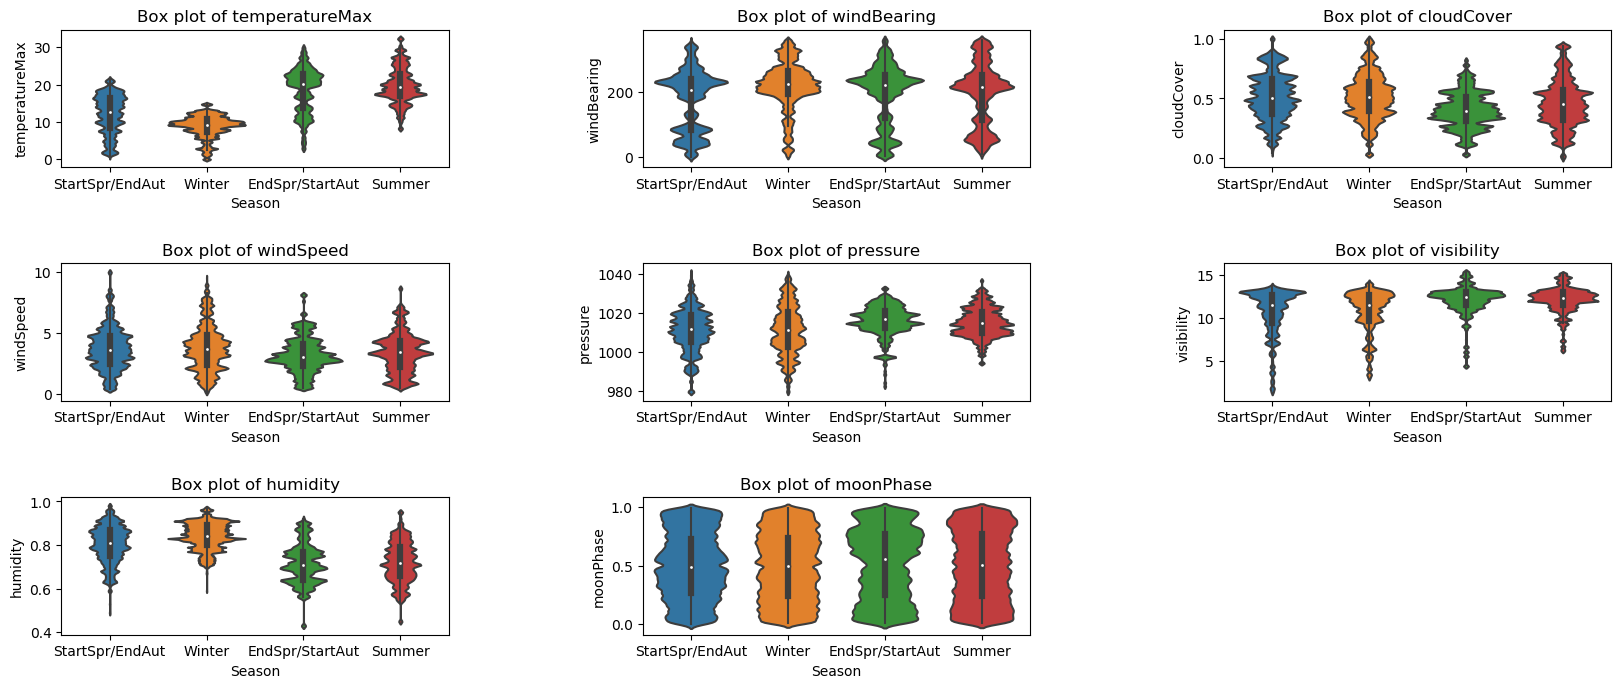

In [18]:
#Violin plots vs Season
def plot_violin(dataset, cols=3, width=20, height=20, hspace=0.7, wspace=0.5):
    
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(list(dataset.loc[:, dataset.dtypes != np.object])):
        ax = fig.add_subplot(rows, cols, i + 1)
        g = sns.violinplot(x='Season', y = column, data = dataset)
        ax.set_title('Box plot of {}'.format(column))
    
plot_violin(energy_df.drop(['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night', 'holiday', 'energy_sum'],
                           axis = 1))
plt.style.use('default')

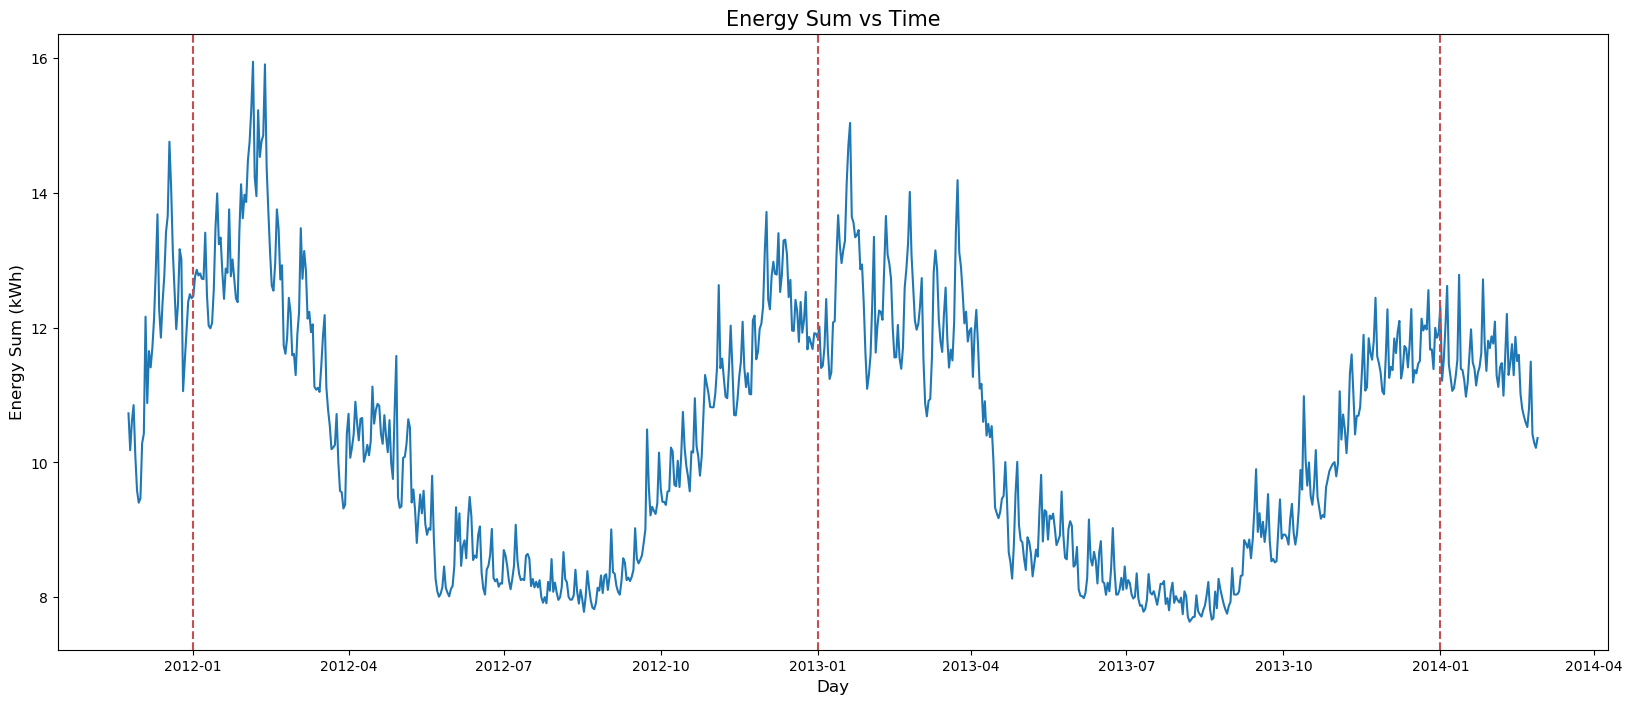

In [19]:
#Energy sum vs Time
plt.style.use('default')

energy_df['day'] = pd.to_datetime(energy_df['day'])
day = pd.DataFrame(energy_df.groupby('day'))

# Plot day vs energy_sum
plt.figure(figsize=(20, 8))

plt.plot(day[0], energy_df.groupby('day').mean()['energy_sum'])
plt.title('Energy Sum vs Time', fontsize = 15)
plt.ylabel('Energy Sum (kWh)', fontsize = 12)
plt.xlabel('Day', fontsize = 12)

xcoords = ['2012-01-01', '2013-01-01', '2014-01-01']
for xc in xcoords:
    x = pd.to_datetime(xc)
    plt.axvline(x=x.date(), color = 'r', linestyle = '--')
    
plt.show()

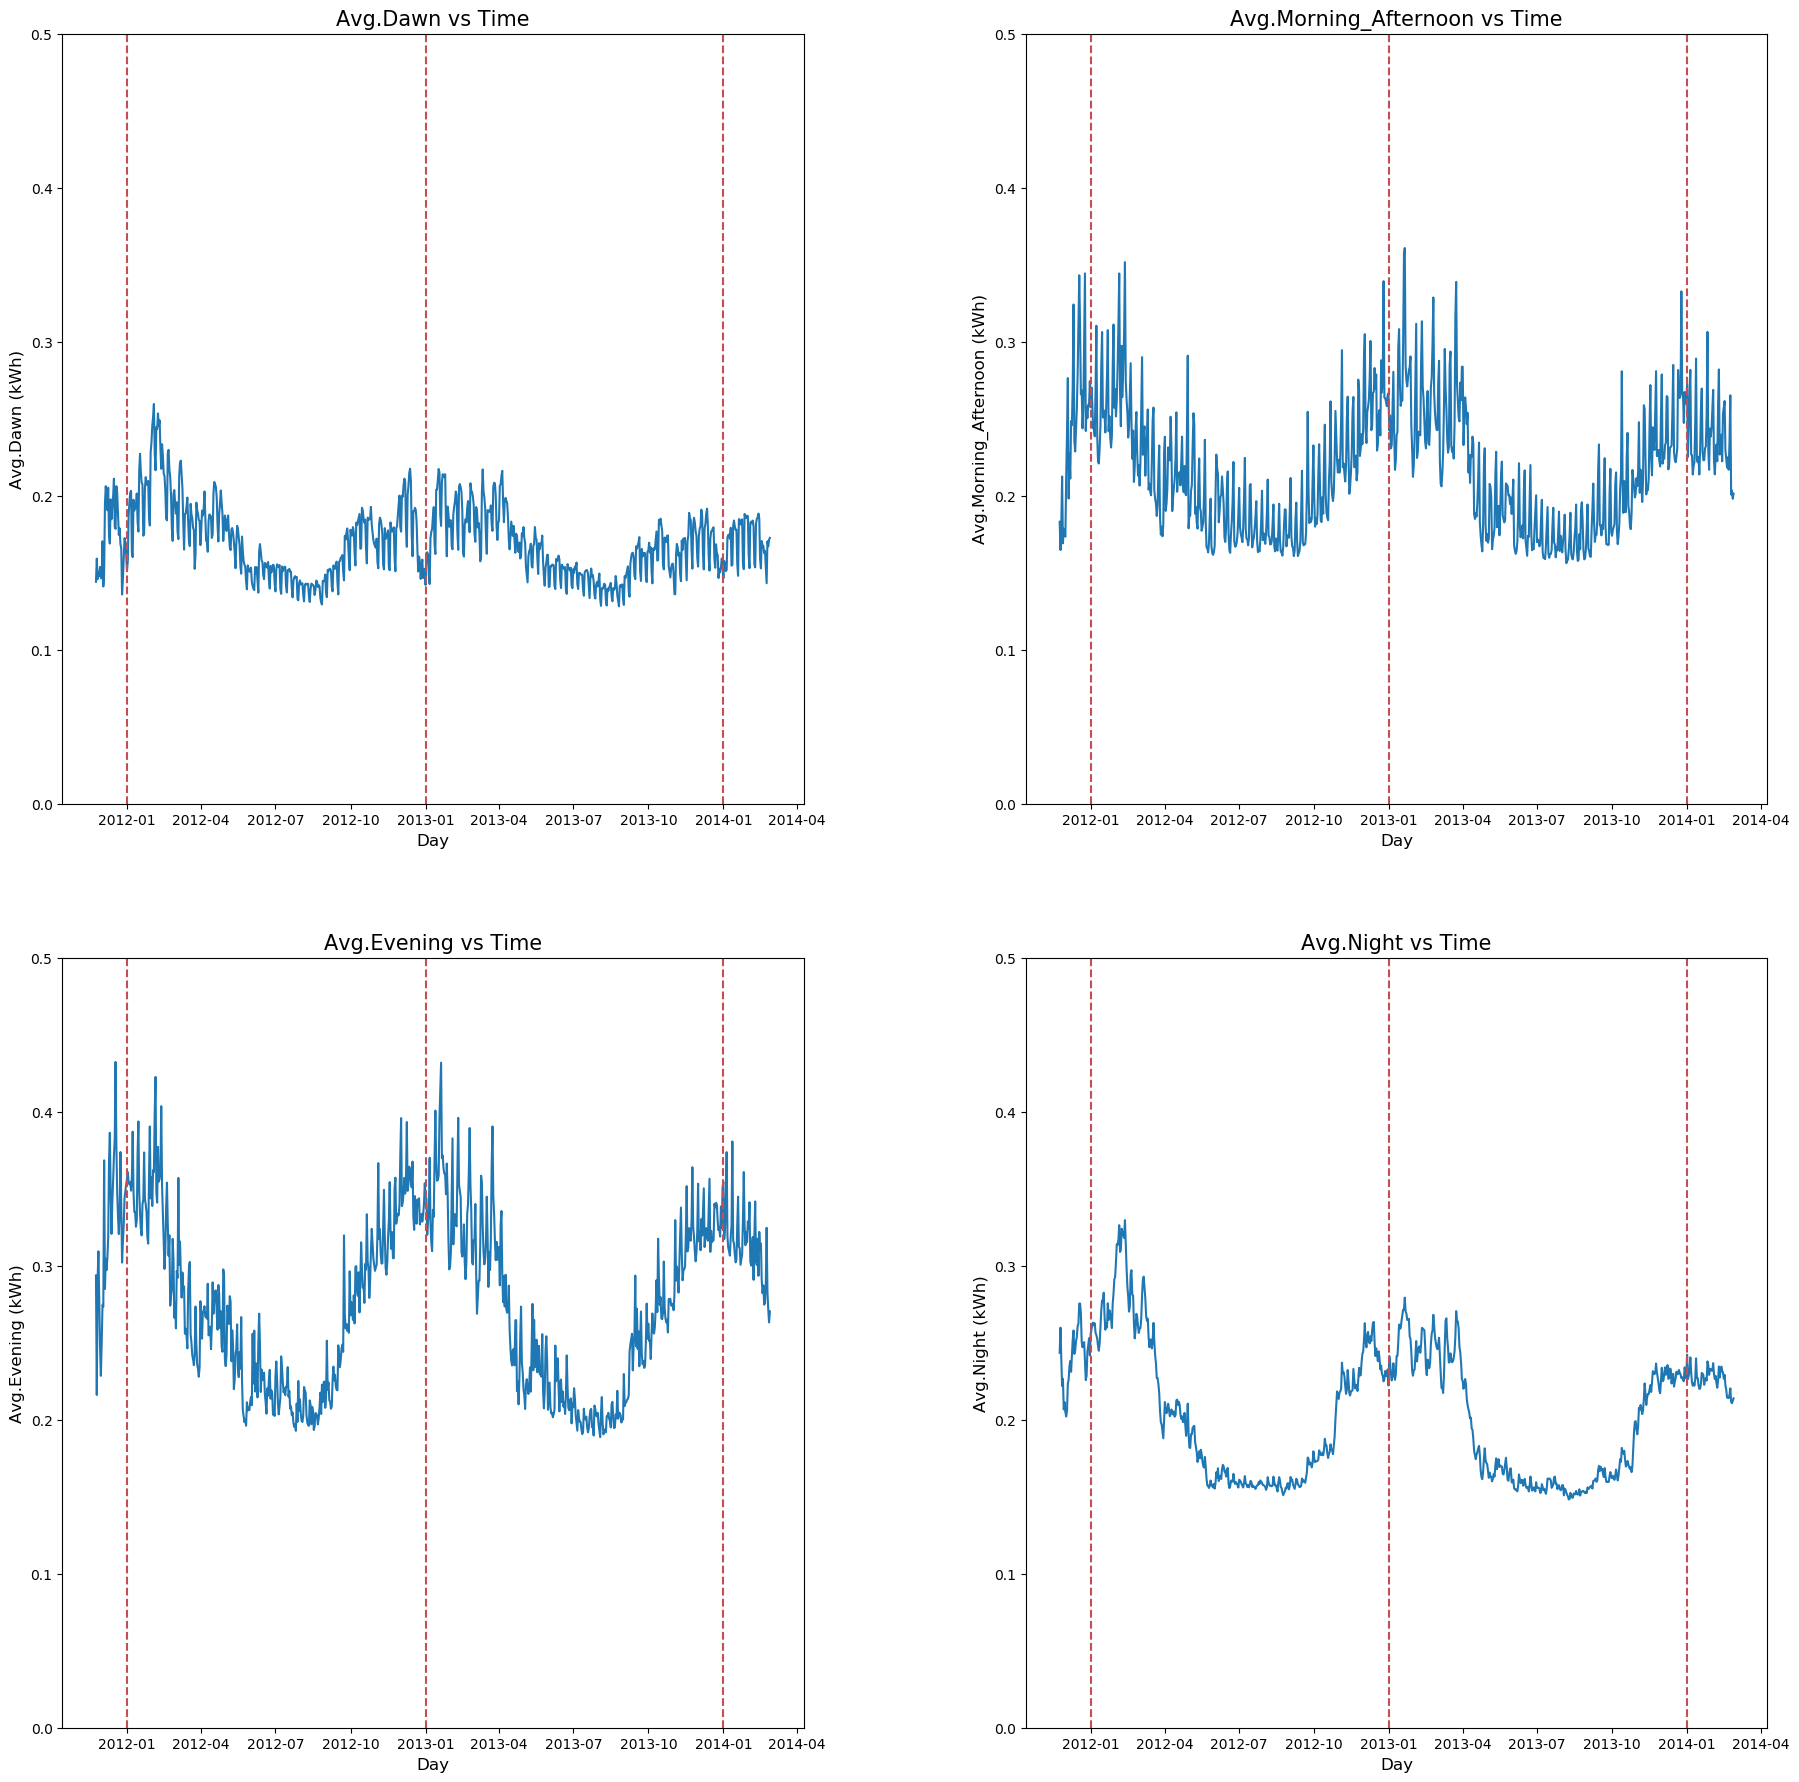

In [20]:
#Averages per time of day vs Time
plt.style.use('default')

energy_df['day'] = pd.to_datetime(energy_df['day'])
day = pd.DataFrame(energy_df.groupby('day'))

# Plot day vs energy_sum
fig = plt.figure(figsize=(22,22))
fig.subplots_adjust(wspace=0.3, hspace=0.2)

for i, column in enumerate(['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night']):
    ax = fig.add_subplot(2, 2, i + 1)
    plt.plot(day[0], energy_df.groupby('day').mean()[column])
    ax.set_title('{} vs Time'.format(column), fontsize = 15)
    ax.set_ylabel('{} (kWh)'.format(column), fontsize = 12)
    ax.set_xlabel('Day', fontsize = 12)
    ax.set_ylim(0, 0.50)
    
    xcoords = ['2012-01-01', '2013-01-01', '2014-01-01']
    for xc in xcoords:
        x = pd.to_datetime(xc)
        plt.axvline(x=x.date(), color = 'r', linestyle = '--')
        
plt.show()

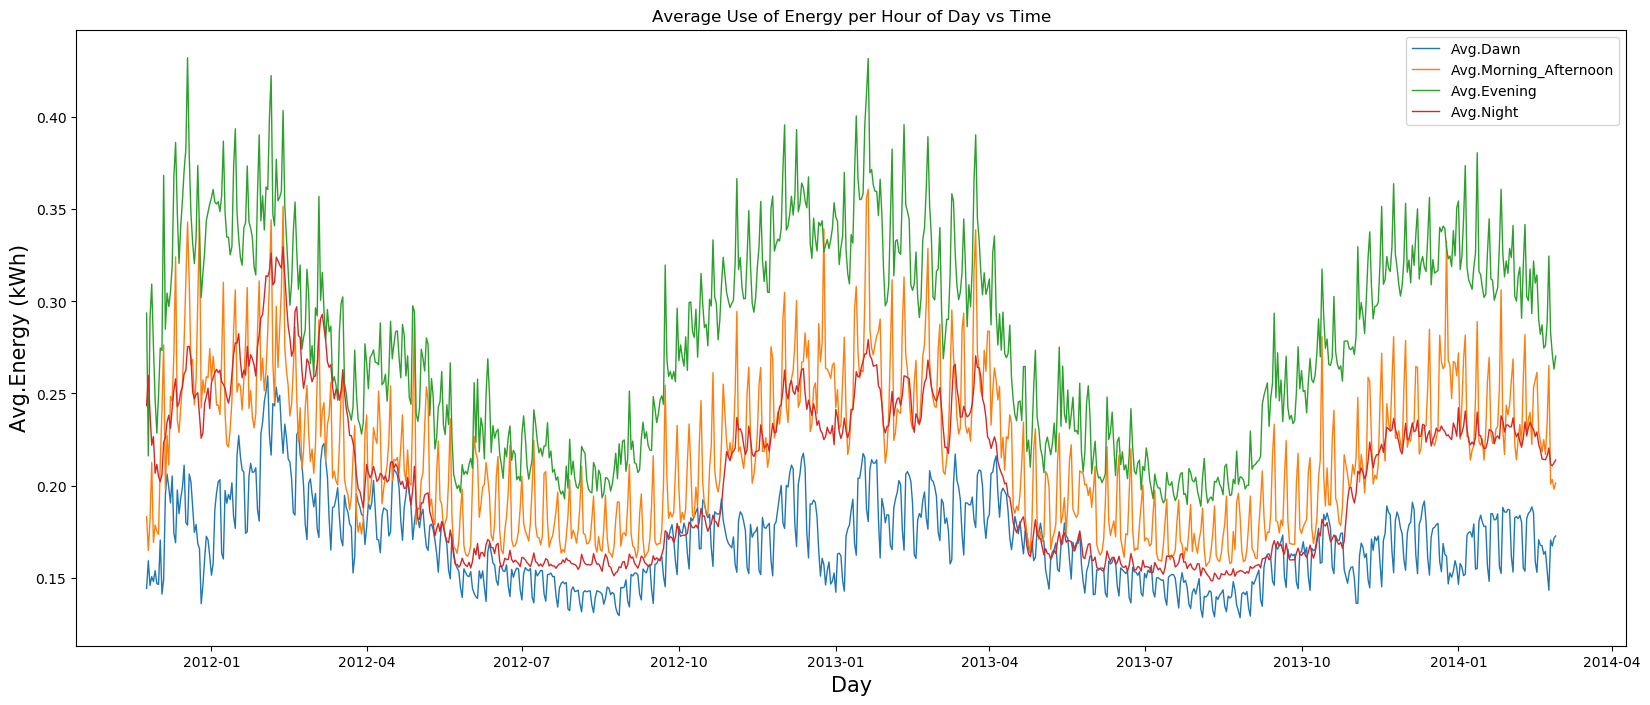

In [21]:
#Averages per time of day vs Time (one plot)
plt.figure(figsize=(20, 8))

for column in ['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night']:
    plt.plot(day[0], energy_df.groupby('day').mean()[column], label=column, linewidth = 1)

plt.title('Average Use of Energy per Hour of Day vs Time')
plt.ylabel('Avg.Energy (kWh)', fontsize = 15)
plt.xlabel('Day', fontsize = 15)
plt.legend(loc="upper right")
    
plt.show()

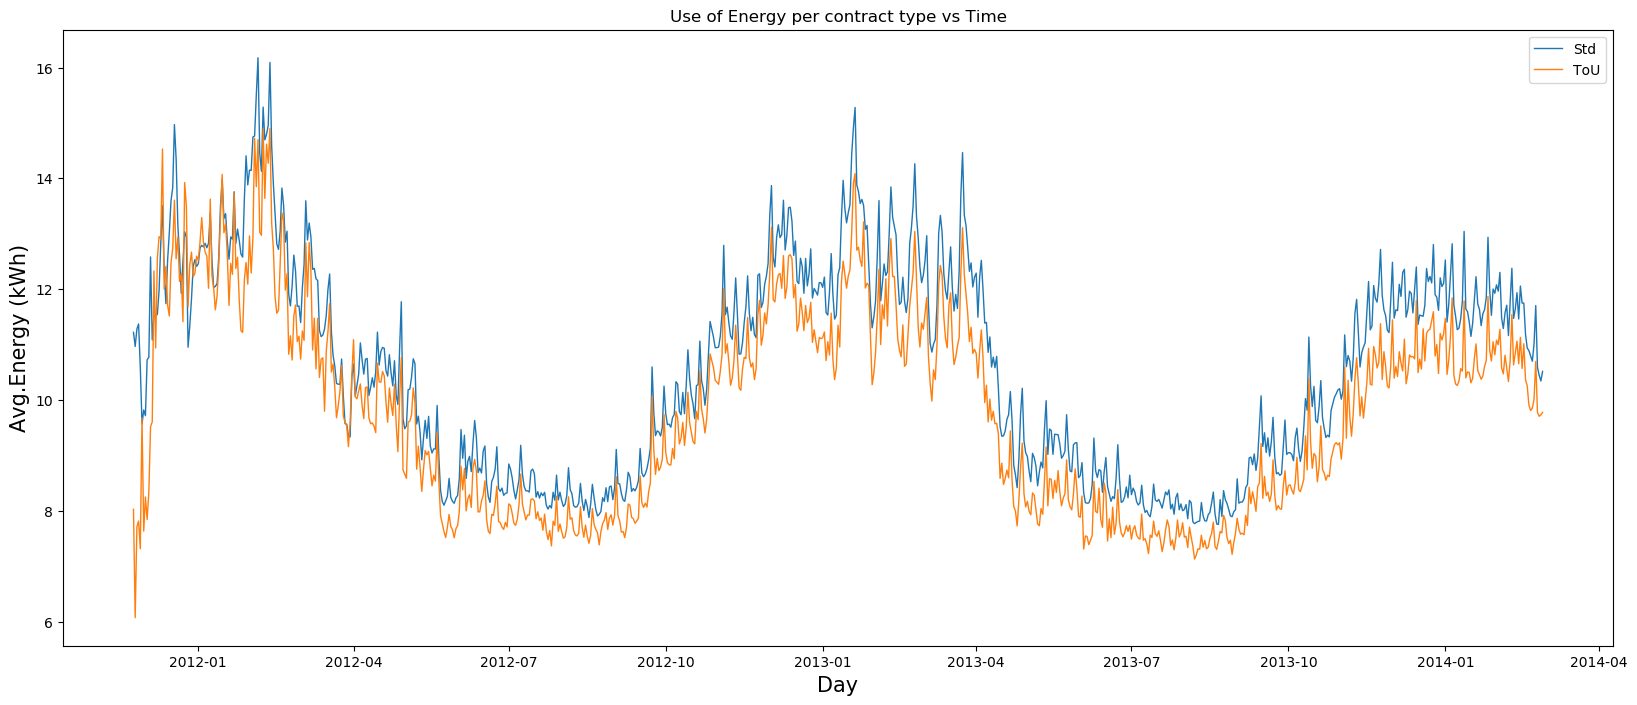

In [22]:
#Energy per Contract Type vs Time
plt.figure(figsize=(20, 8))
for value in ['Std', 'ToU']:
    contract_type = energy_df[energy_df['stdorToU'] == value]
    plt.plot(day[0], contract_type.groupby('day').mean()['energy_sum'], label=value, linewidth = 1)

plt.title('Use of Energy per contract type vs Time')
plt.ylabel('Avg.Energy (kWh)', fontsize = 15)
plt.xlabel('Day', fontsize = 15)
plt.legend(loc="upper right")
    
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

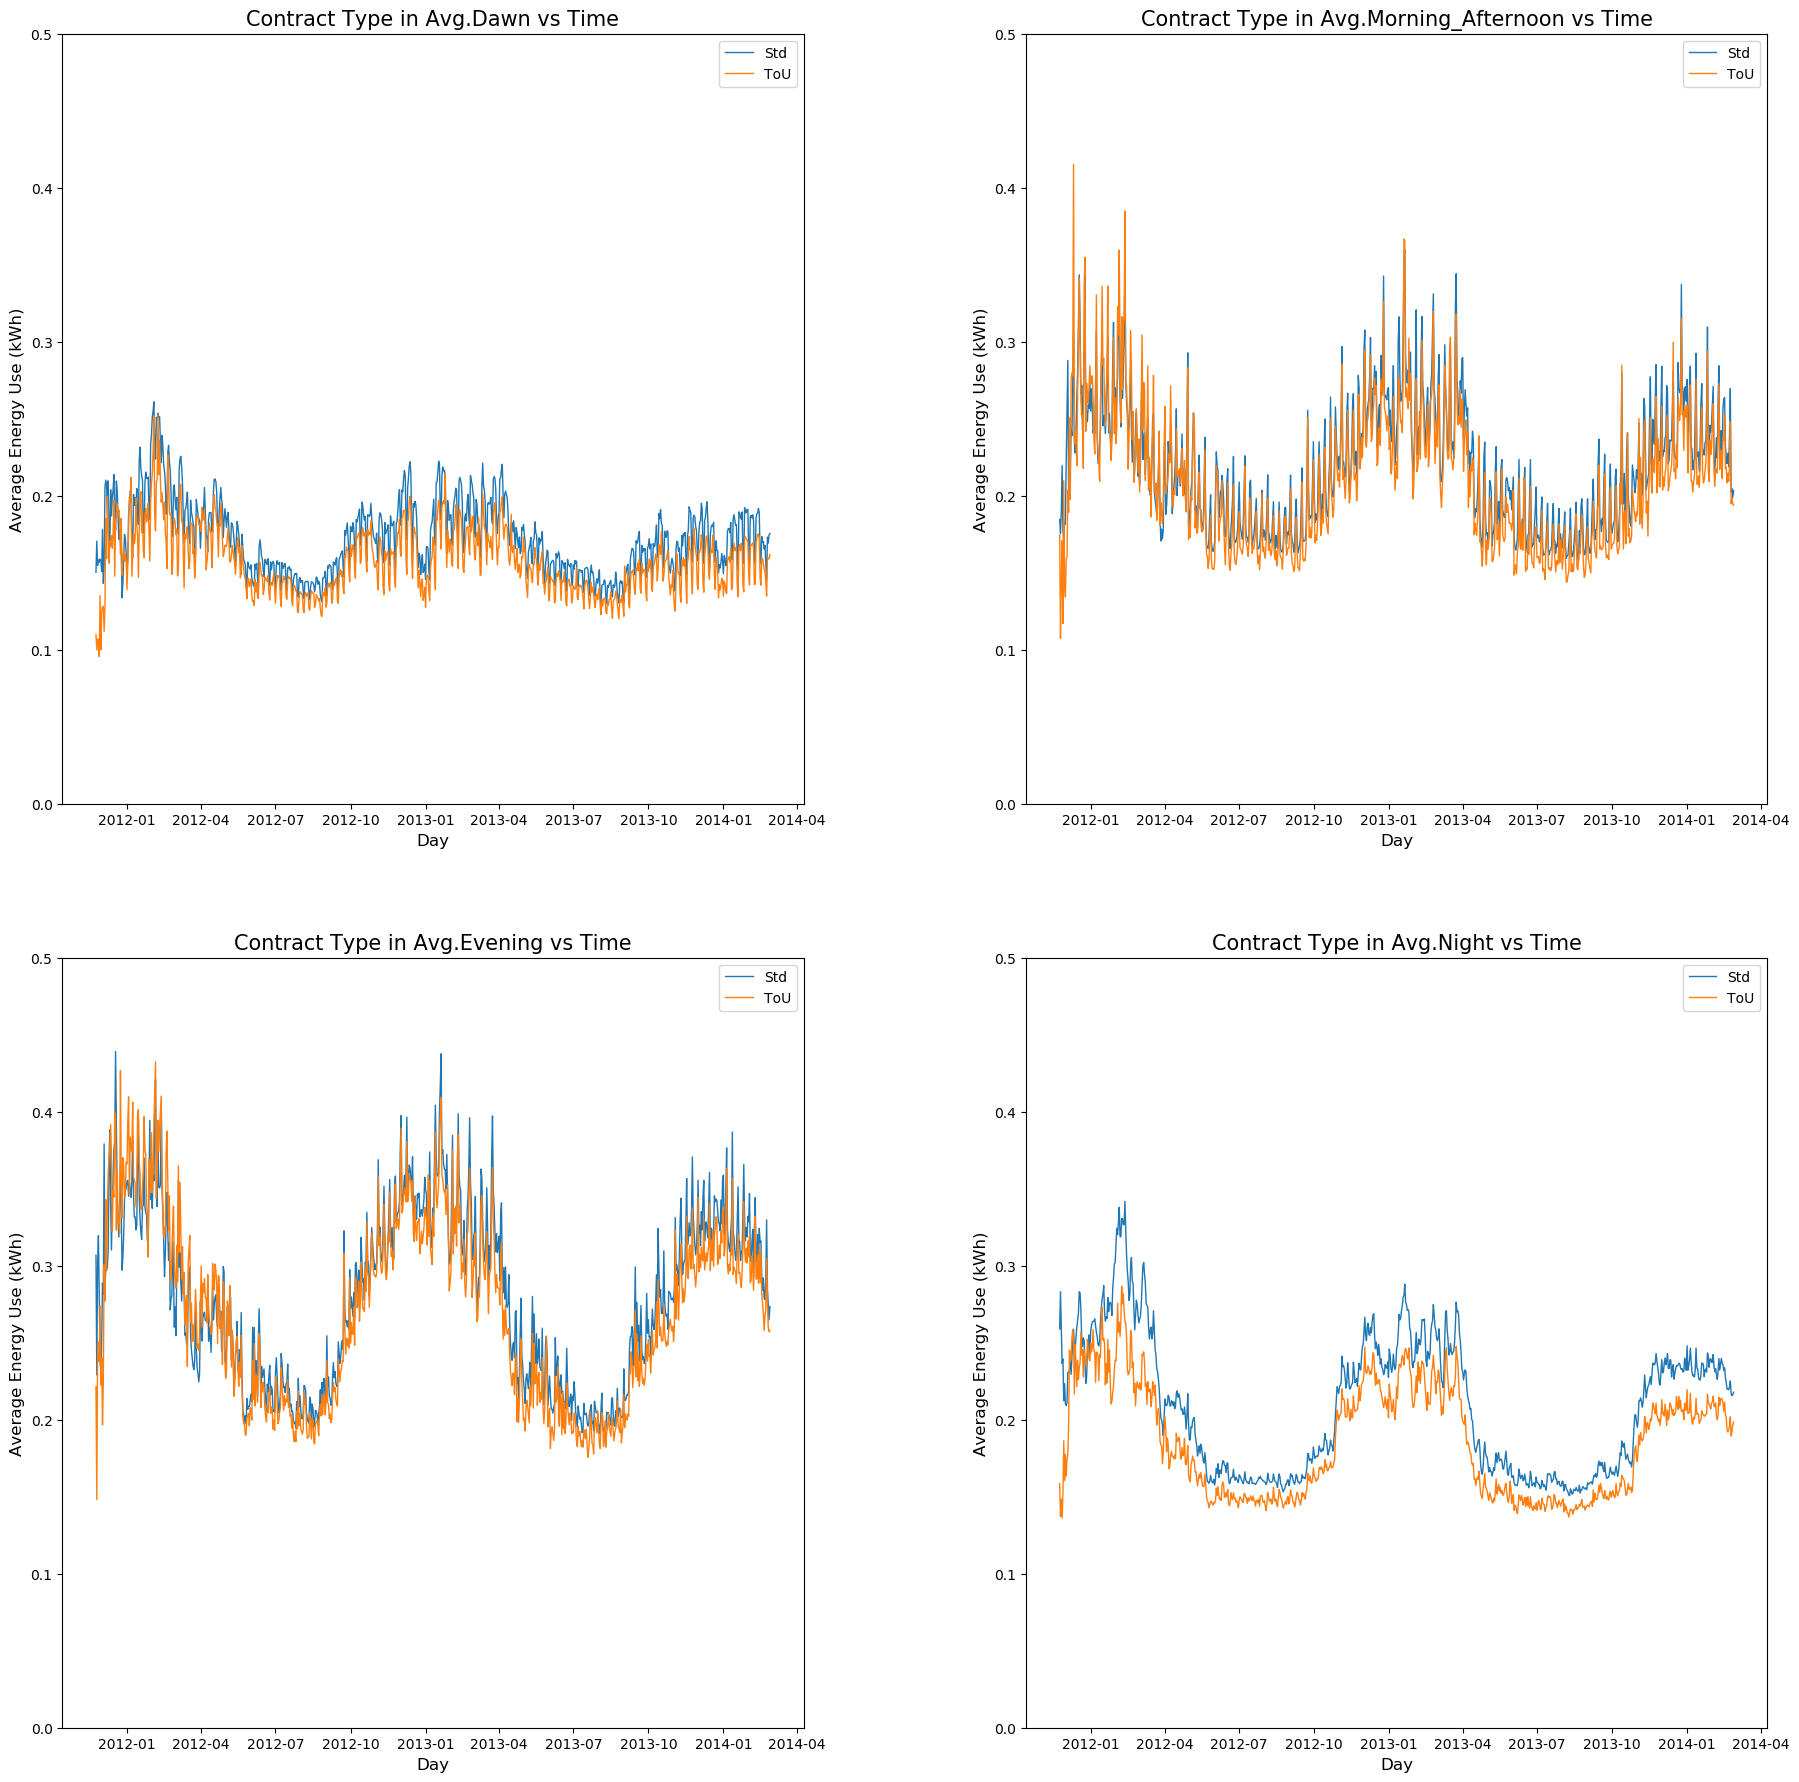

In [23]:
#Energy per Contract Type (time of day) vs Time
plt.style.use('default')

fig = plt.figure(figsize=(22,22))
fig.subplots_adjust(wspace=0.3, hspace=0.2)
for i, column in enumerate(['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night']):
    for value in ['Std', 'ToU']:
        ax = fig.add_subplot(2, 2, i + 1)
        contract_type = energy_df[energy_df['stdorToU'] == value]
        plt.plot(day[0], contract_type.groupby('day').mean()[column], label=value, linewidth = 1)
        ax.set_title('Contract Type in {} vs Time'.format(column), fontsize = 15)
        ax.set_ylabel('Average Energy Use (kWh)'.format(column), fontsize = 12)
        ax.set_xlabel('Day', fontsize = 12)
        ax.set_ylim(0, 0.50)
        #ax.set_xticklabels([])
        plt.legend(loc="upper right")
    
plt.show()

In [24]:
#Function to create text in graphs
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

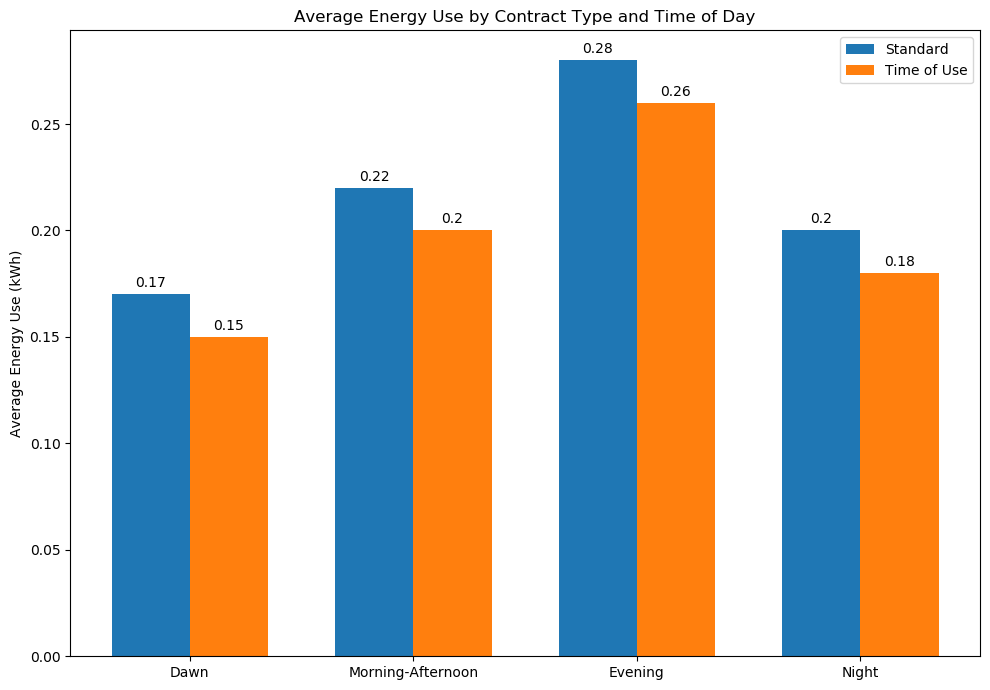

In [25]:
#Average Energy Use by Contract Type and Time of Day
labels = ['Dawn', 'Morning-Afternoon', 'Evening', 'Night']
values = energy_df.groupby('stdorToU').mean()[['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening', 'Avg.Night']].to_numpy()
std = list(np.around(values[0],2))
tou = list(np.around(values[1],2))

x = np.arange(len(labels))  
width = 0.35

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, std, width, label='Standard')
rects2 = ax.bar(x + width/2, tou, width, label='Time of Use')

ax.set_ylabel('Average Energy Use (kWh)')
ax.set_title('Average Energy Use by Contract Type and Time of Day')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

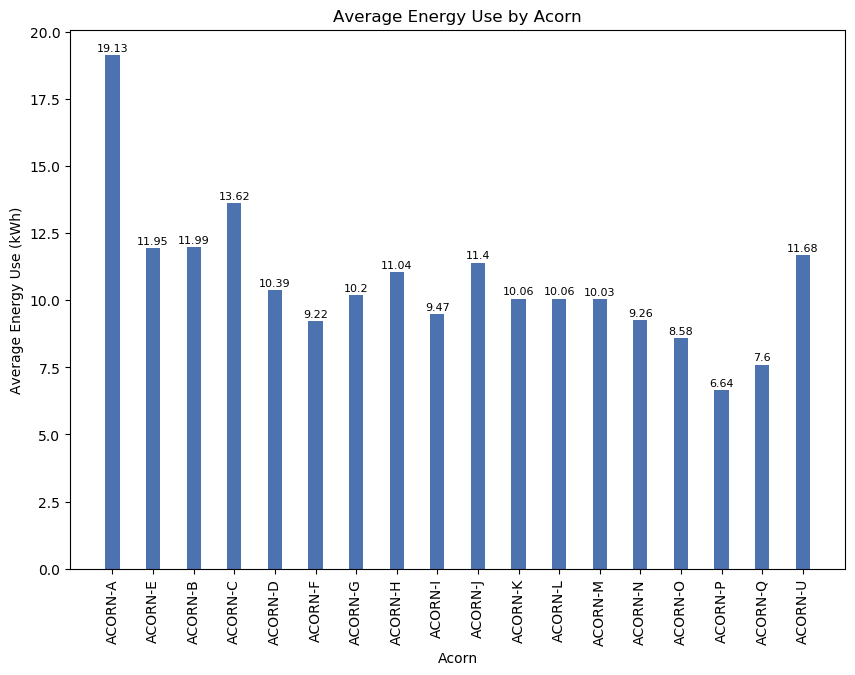

In [26]:
#Average Energy per Acorn 
labels_ac = energy_df['Acorn'].unique()
values_ac = energy_df.groupby('Acorn').mean()['energy_sum'].to_numpy()
average = list(np.around(values_ac,2))

fig, ax = plt.subplots(figsize=(10,7))

for i, label in enumerate(labels_ac):
    plt.bar(label, average[i], width = 0.35, label = label, color = 'b')
    plt.text(label, average[i] + 0.15, str(average[i]), horizontalalignment='center', fontsize = 8)
        
plt.title('Average Energy Use by Acorn')
plt.xlabel('Acorn')
plt.ylabel('Average Energy Use (kWh)')
plt.xticks(rotation = 90)

plt.show()

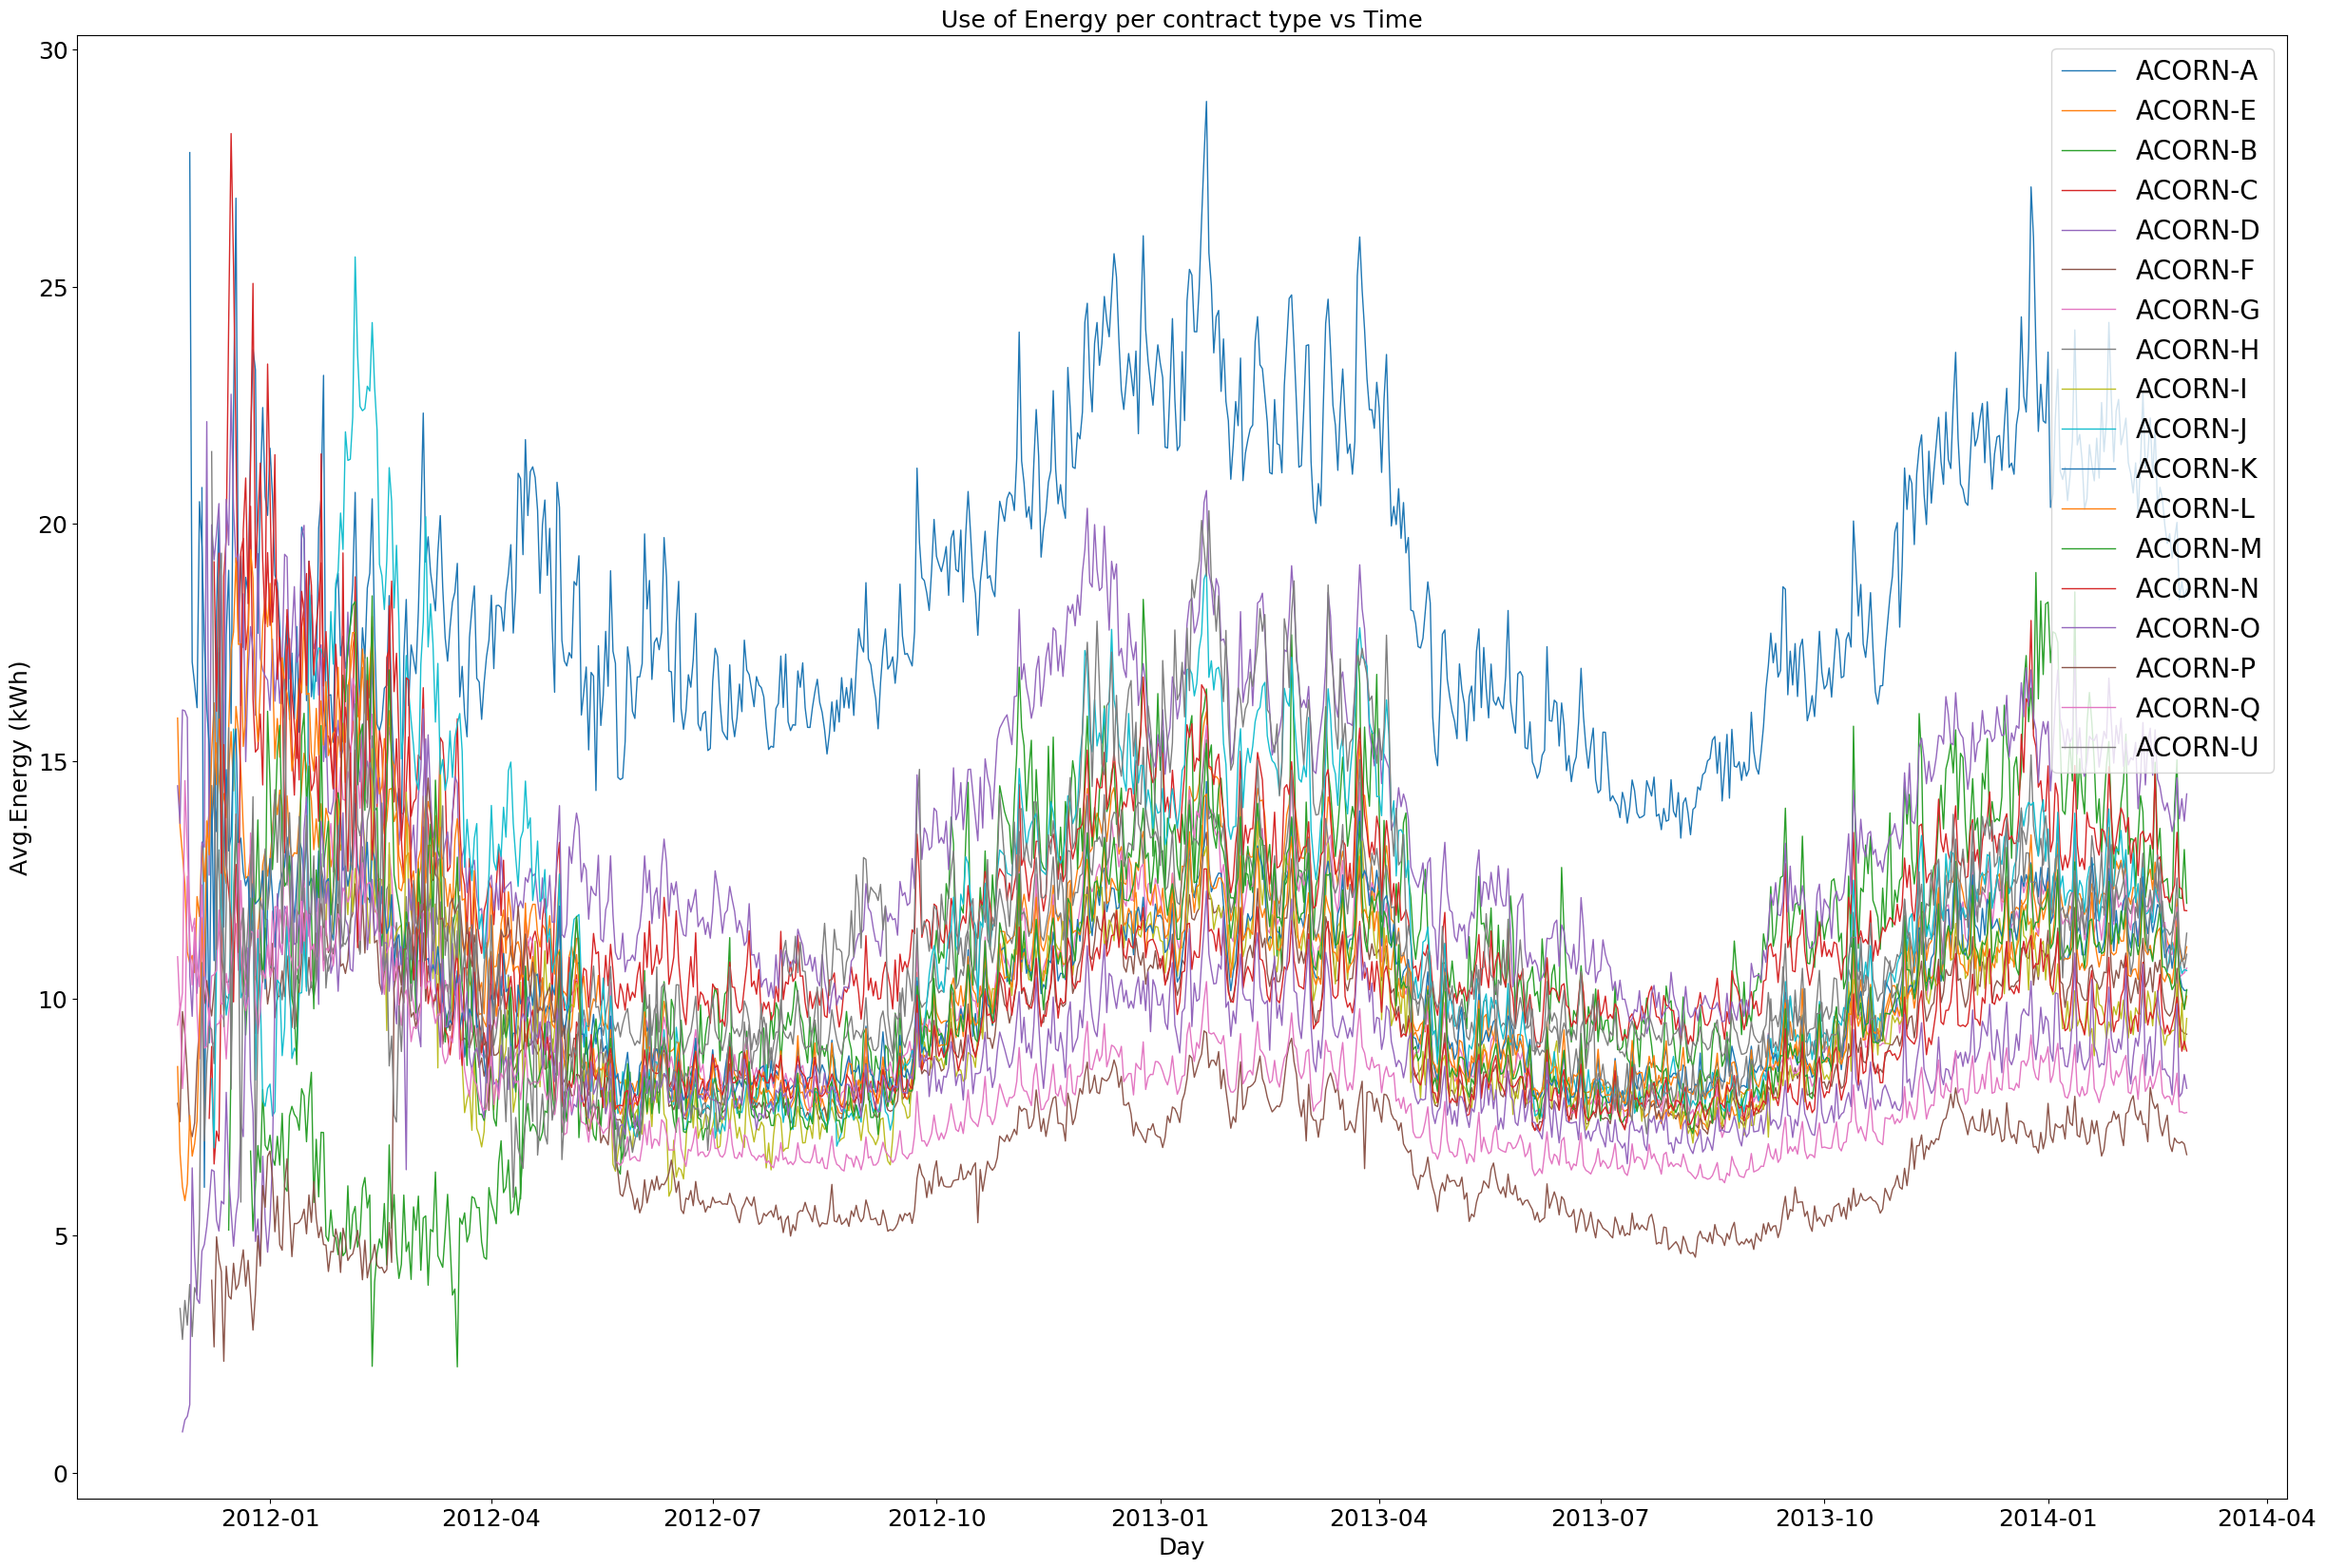

In [27]:
#Average Energy per Acorn vs Time
plt.figure(figsize=(30, 20))
for value in energy_df['Acorn'].unique():
    acorn = energy_df[energy_df['Acorn'] == value]
    acorn_df = pd.DataFrame(acorn.groupby('day'))
    plt.plot(acorn_df[0], acorn.groupby('day').mean()['energy_sum'], label=value, linewidth = 1)

plt.title('Use of Energy per contract type vs Time', fontsize = 18)
plt.ylabel('Avg.Energy (kWh)', fontsize = 18)
plt.xlabel('Day', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc="upper right", prop={'size': 20})

    
plt.show()

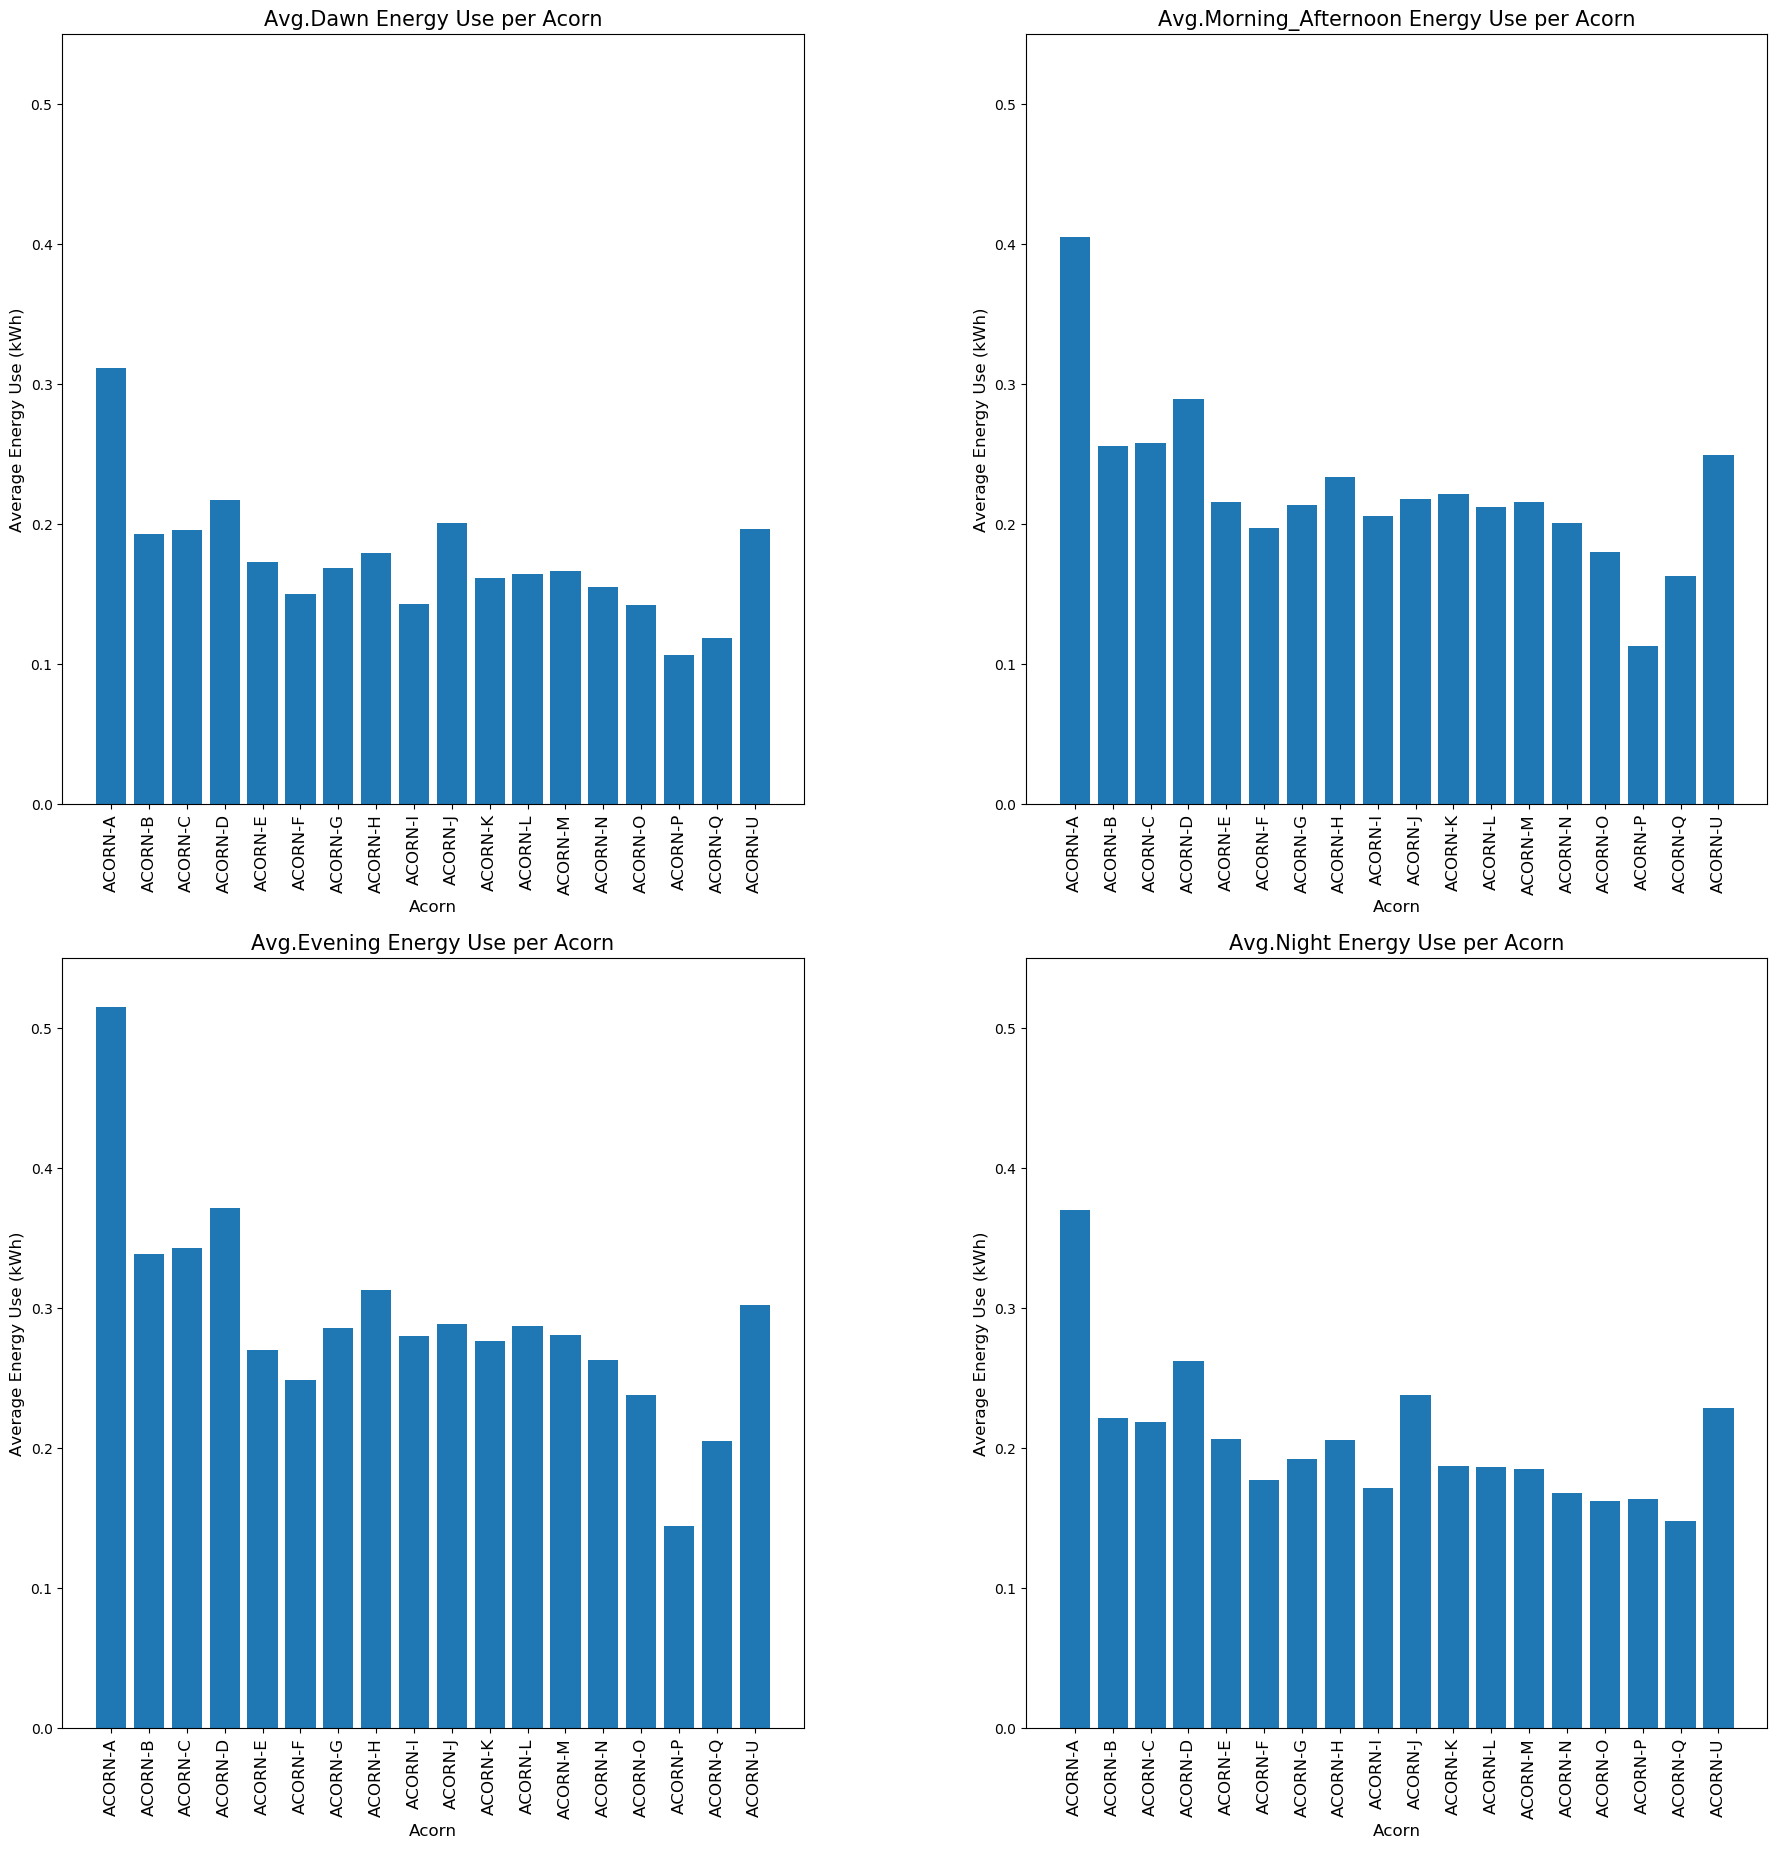

In [28]:
#Average Energy Use per Acorn by Time of Day
plt.style.use('default')

labels_aco = pd.DataFrame(energy_df.groupby('Acorn'))[0]

fig = plt.figure(figsize=(22,22))
fig.subplots_adjust(wspace=0.3, hspace=0.2)
for i, column in enumerate(['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night']):
    ax = fig.add_subplot(2, 2, i + 1)
    plt.bar(labels_aco, energy_df.groupby('Acorn').mean()[column])
    ax.set_title('{} Energy Use per Acorn'.format(column), fontsize = 15)
    ax.set_ylabel('Average Energy Use (kWh)'.format(column), fontsize = 12)
    ax.set_xlabel('Acorn', fontsize = 12)
    ax.set_xticklabels(labels_aco, rotation = 90, fontsize = 12)
    ax.set_ylim(0, 0.55)
    
plt.show()

     Feature Importance and Elimination

In [58]:
##Preparing Data for Feature Importance analysis
#One-Hot Encode 'stdorToU', 'Acorn', 'Acorn_grouped', icon, precipType, uvIndex, Sunrise, Sunset, and Season

energy_df = pd.get_dummies(energy_df, columns=['sunset', 'sunrise'],
                           prefix=['ohe_sunset', 'ohe_sunrise'])
energy_df = pd.get_dummies(energy_df, columns=['stdorToU', 'Acorn', 'Acorn_grouped', 'icon', 'precipType',
                                              'uvIndex', 'Season'],
                           prefix=['ohe', 'ohe', 'ohe', 'oheicon', 'oheprecipType', 'oheuv', 'ohe'], 
                           drop_first = True)

In [60]:
#Checking changes 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(energy_df.head())

LCLid         day  Avg.Dawn  Avg.Morning_Afternoon  Avg.Evening  \
0  MAC000002  2012-10-13  0.133556               0.266667       0.2927   
1  MAC000246  2012-10-13  0.227889               0.342667       0.3197   
2  MAC000450  2012-10-13  1.216778               2.424250       2.7396   
3  MAC001074  2012-10-13  0.294333               0.552583       0.7322   
4  MAC003223  2012-10-13  0.126000               0.521250       0.6157   

   Avg.Night  holiday  energy_sum  temperatureMax  windBearing  cloudCover  \
0   0.218854        0   11.087000           12.32          300         0.2   
1   0.552292        0   19.283000           12.32          300         0.2   
2   1.344580        0   89.343999           12.32          300         0.2   
3   0.366943        0   22.727000           12.32          300         0.2   
4   0.335382        0   19.271000           12.32          300         0.2   

   windSpeed  pressure  visibility  humidity  moonPhase  ohe_sunset_16:00:00  \
0       2.36    1002.5       11.86       0.8       0.96                    0   
1       2.36    1002.5       11.86       0.8       0.96                    0   
2       2.36    1002.5       11.86       0.8       0.96                    0   
3       2.36    1002.5       11.86       0.8       0.96                    0   
4       2.36    1002.5       11.86       0.8       0.96                    0   

   ohe_sunset_17:00:00  ohe_sunset_18:00:00  ohe_sunset_19:00:00  \
0                    1                    0                    0   
1                    1                    0                    0   
2                    1                    0                    0   
3                    1                    0                    0   
4                    1                    0                    0   

   ohe_sunset_20:00:00  ohe_sunrise_04:00:00  ohe_sunrise_05:00:00  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   ohe_sunrise_06:00:00  ohe_sunrise_07:00:00  ohe_sunrise_08:00:00  ohe_ToU  \
0                     1                     0                     0        0   
1                     1                     0                     0        0   
2                     1                     0                     0        0   
3                     1                     0                     0        1   
4                     1                     0                     0        0   

   ohe_ACORN-B  ohe_ACORN-C  ohe_ACORN-D  ohe_ACORN-E  ohe_ACORN-F  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   ohe_ACORN-G  ohe_ACORN-H  ohe_ACORN-I  ohe_ACORN-J  ohe_ACORN-K  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ohe_ACORN-L  ohe_ACORN-M  ohe_ACORN-N  ohe_ACORN-O  ohe_ACORN-P  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ohe_ACORN-Q  ohe_ACORN-U  ohe_Afflu

In [64]:
#Creating X and y
X = energy_df.drop(['energy_sum', 'LCLid', 'day'], axis = 1)
y = energy_df['energy_sum']

In [67]:
plt.style.use('seaborn-whitegrid')

rf = RandomForestRegressor()
model = rf.fit(X, y)
importances = model.feature_importances_

NameError: name 'importance' is not defined

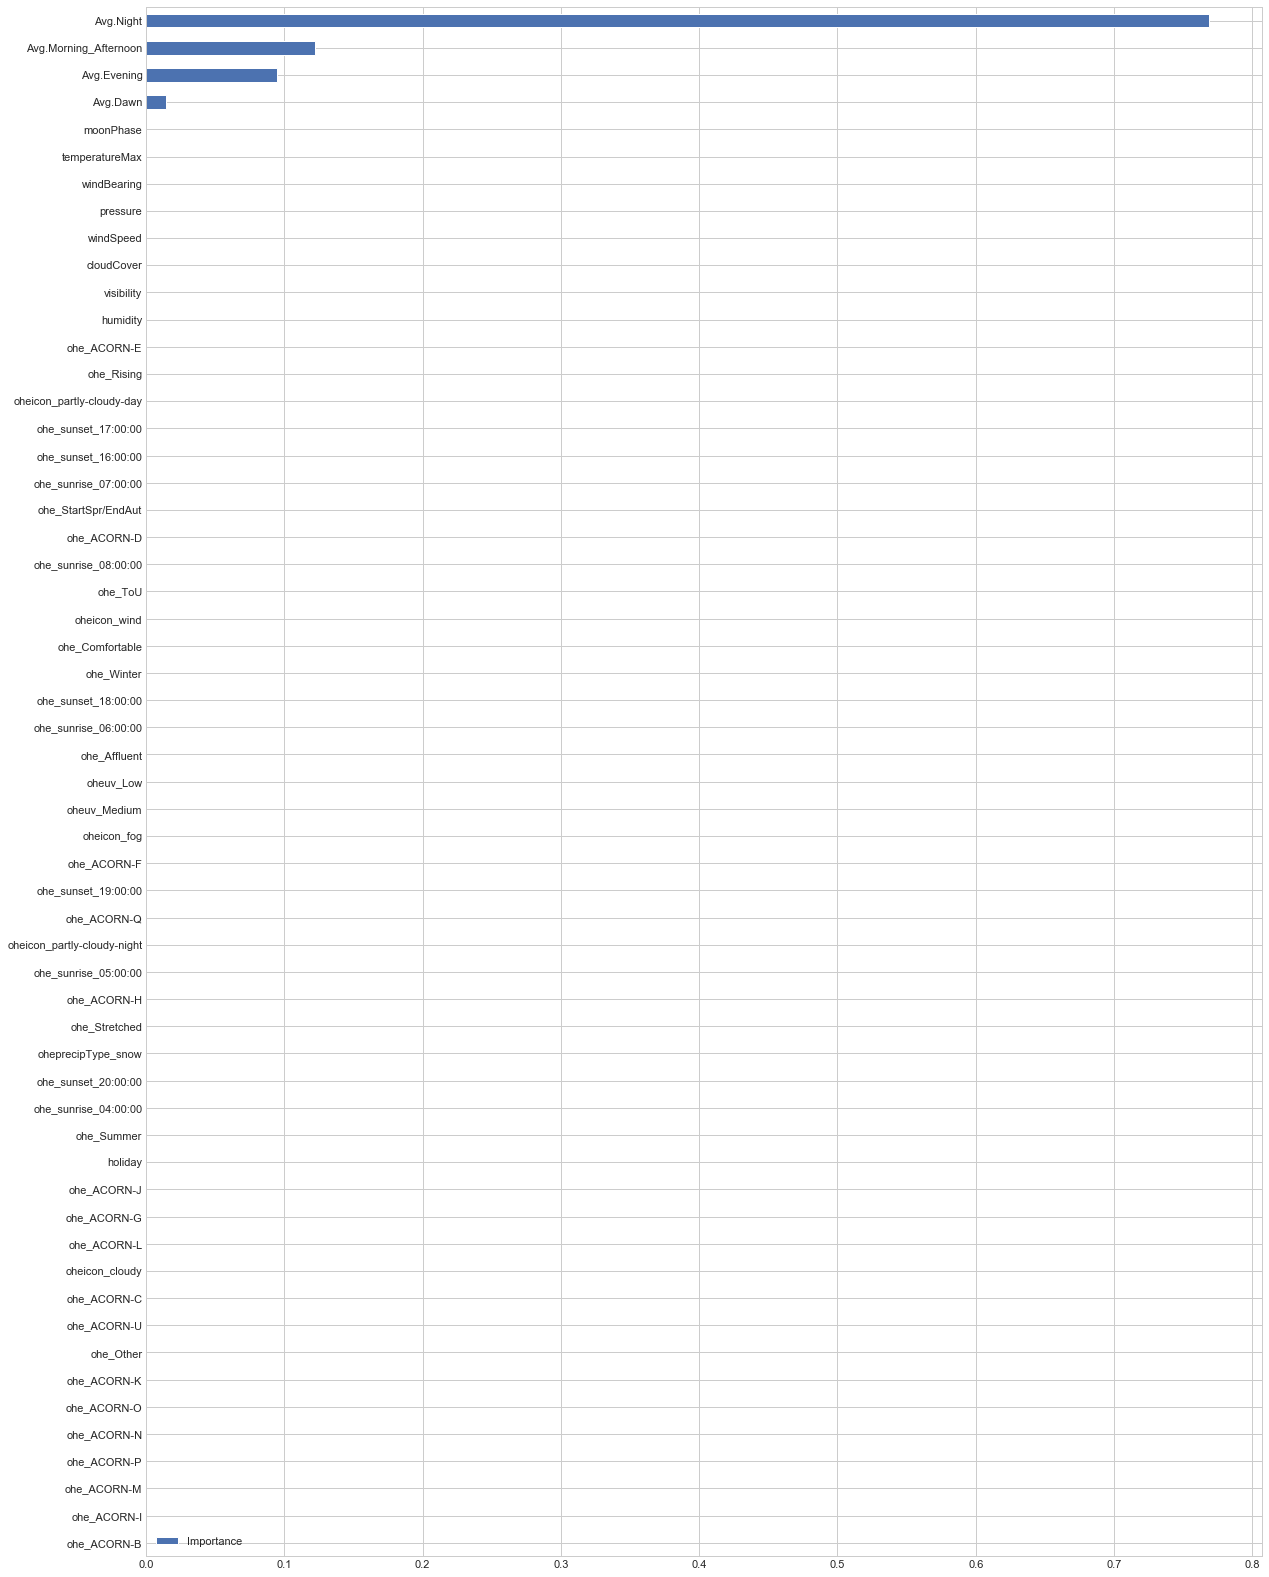

In [69]:
importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"])
importances.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importances)/2))

In [72]:
energy_df['LCLid'].value_counts()

MAC000147    824
MAC000162    823
MAC000152    822
MAC000145    822
MAC000165    821
            ... 
MAC001653     76
MAC001278     10
MAC001957     10
MAC002110      9
MAC001300      6
Name: LCLid, Length: 5560, dtype: int64